This project is brought to you by DJ and Amy

# Lab 6:  Implement your own version of K-means

In class we have discussed how the K-means algorithm works, and you can read more about it in the text.  Your task this week is to implement your own version of K-means, and use it to cluster faces in the Olivetti dataset.  

You can work on this task either by yourself, or with one or two partners.  Please do *not* have a groupsize larger than 3, however.  Submission instructions are on Canvas.


# Part I:  Implement K-means

Your task is to implement a function called `get_clusters` that takes in a set of data and a number of clusters, and returns the centroids of those clusters, as well as the closest centroid for each data point.  Your code should make use of reasonable subfunctions, use good choices of variables, and be commented as necessary.

In [ ]:
import numpy as np


In [ ]:
def get_clusters(data: np.ndarray, n_clusters: int) -> tuple[np.ndarray, np.ndarray]:
    # Fill in the details.  This function should probably consist of some kind of loop,
    # and the work within that loop should mostly be done via calls to other functions
    # that you define and that carry out small, specific tasks
    n_clusters = data.n_clusters
    data = np.ndarray

    centroids = np.random.rand(n_clusters, data.shape[1])
    for i, point in enumerate(data): # find the difference between the point and each centroid then assign to said data point
      closest_centroids[i] = np.argmin(np.linalg.norm(centroids - point, axis=1))

    # Return the centroids and the closest centroid for each datapoint
    return centroids, closest_centroids

# Part II:  Use your code to cluster the Olivetti dataset

Now use your clustering code to cluster the following pseudo-random data.  Examine the following questions:
* How well does your code do if you try to use 4 clusters?
* How well does it do if you use a different number of clusters?  Show how some perforamance metric changes over the number of clusters
* What happens if you modify the data to be either more or less overlapped?  (You can do this by adjusting the 'cluster_center' variable, or the covs)?

Note:  if you had any issues with the implementation in Part I, just use the default KMeans class from SKLearn for this part

In [ ]:
import pandas as pd
import seaborn as sns

### Generate psuedo random clusters

In [ ]:
# These are the "actual" centers in the x-y plane
cluster_centers = [
    (0, 0),
    (1, 1),
    (2, 2),
    (3, 3)
]
# The values change how "spread out" the data is.  Feel feel to play with them.
# The bigger the values, the more spread out the data points.  These values need to represent
# symmetric matrices
covs = [
    [[.5, 0], [0, .3]],
    [[.5, .1], [.1, .5]],
    [[.5, .1], [.1, .5]],
    [[.10, 0], [0, .10]],
]
n_pts_per_cluster = 30

data = []
for ix, cluster in enumerate(cluster_centers):
    cov = covs[ix]
    samples = np.random.default_rng().multivariate_normal(mean=cluster, cov=cov, size=20)
    data += [(ix, s[0], s[1]) for s in samples]

data = pd.DataFrame(data, columns=['label', 'x', 'y'])


### Visualze the data

<Axes: xlabel='x', ylabel='y'>

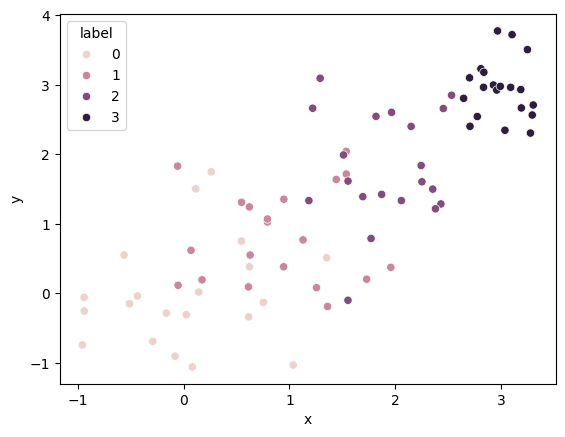

In [ ]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='label'
)

### Experiment with clustering here

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
For n_clusters = 2, the average silhouette_score is : 0.15156598389148712


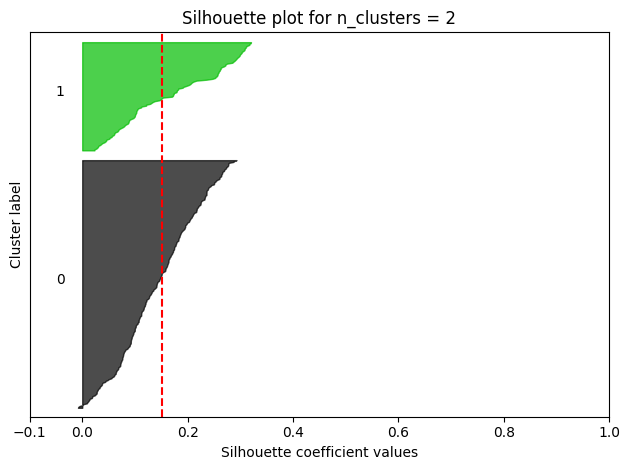

For n_clusters = 3, the average silhouette_score is : 0.12549062073230743


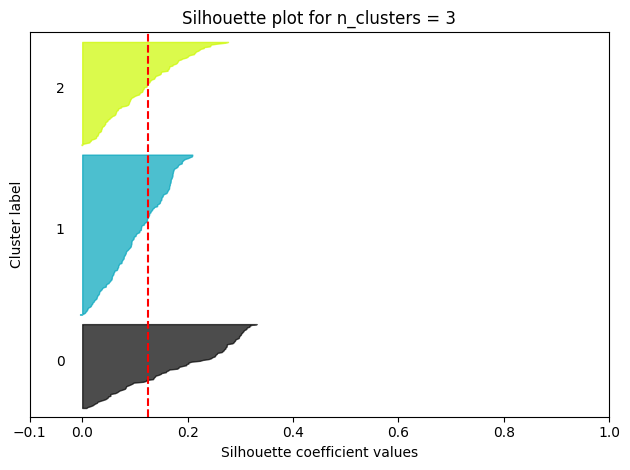

For n_clusters = 4, the average silhouette_score is : 0.10698631405830383


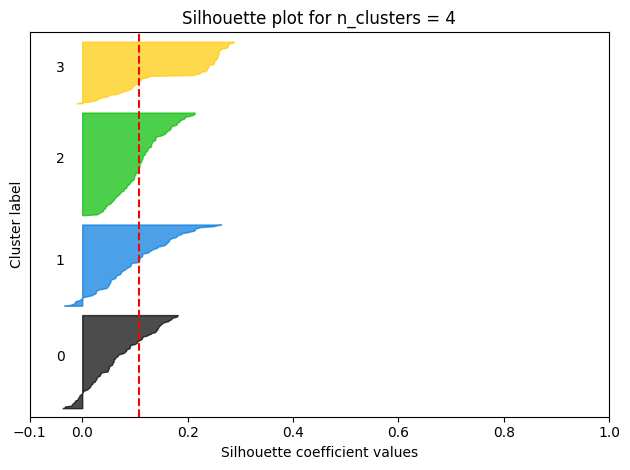

For n_clusters = 5, the average silhouette_score is : 0.10601285845041275


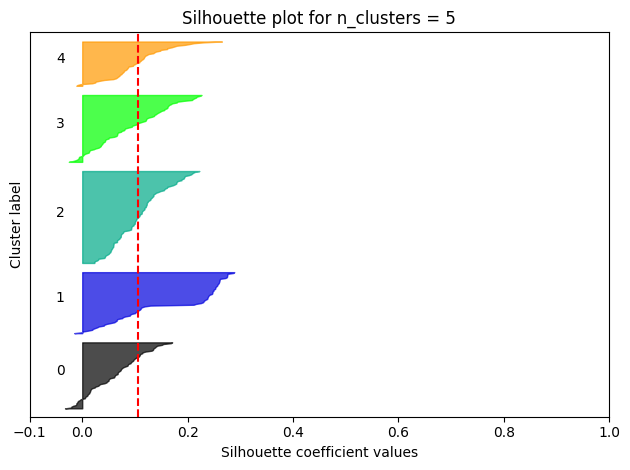

For n_clusters = 6, the average silhouette_score is : 0.10753079503774643


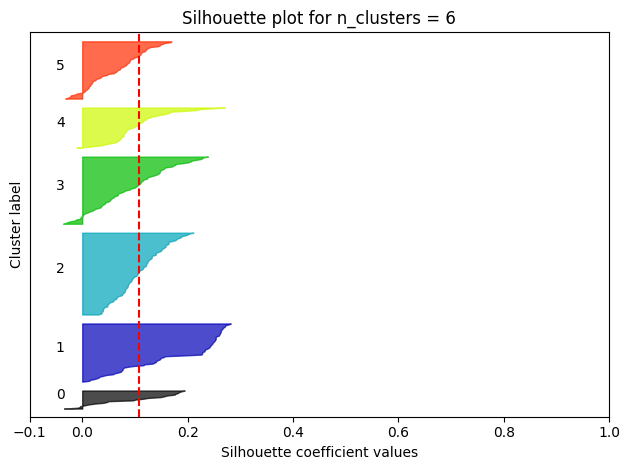

For n_clusters = 7, the average silhouette_score is : 0.10574773699045181


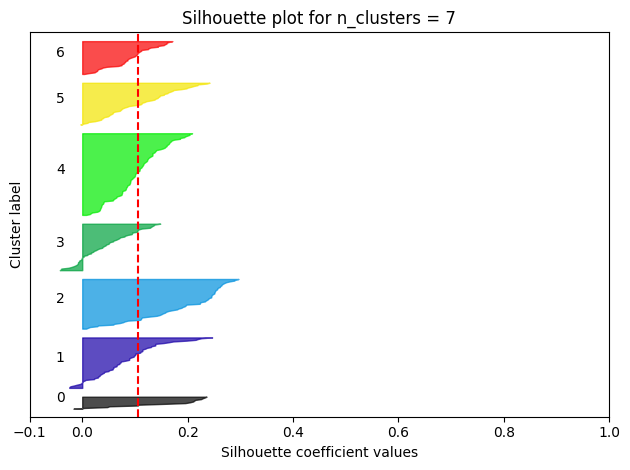

For n_clusters = 8, the average silhouette_score is : 0.09437118470668793


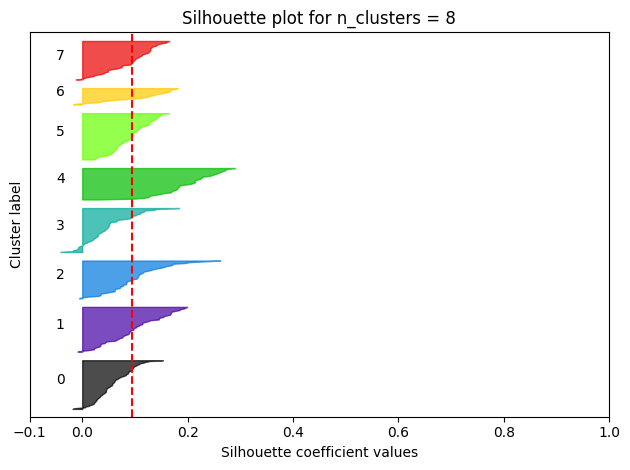

For n_clusters = 9, the average silhouette_score is : 0.09248845279216766


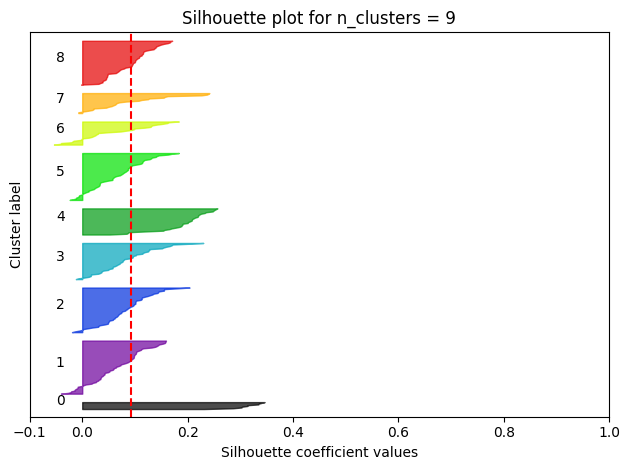

For n_clusters = 10, the average silhouette_score is : 0.09155301004648209


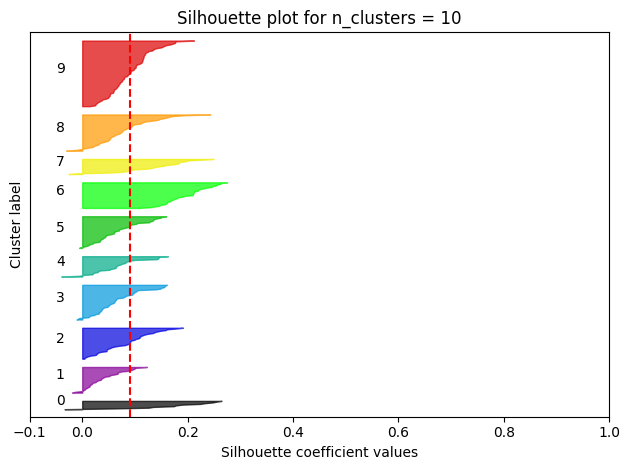

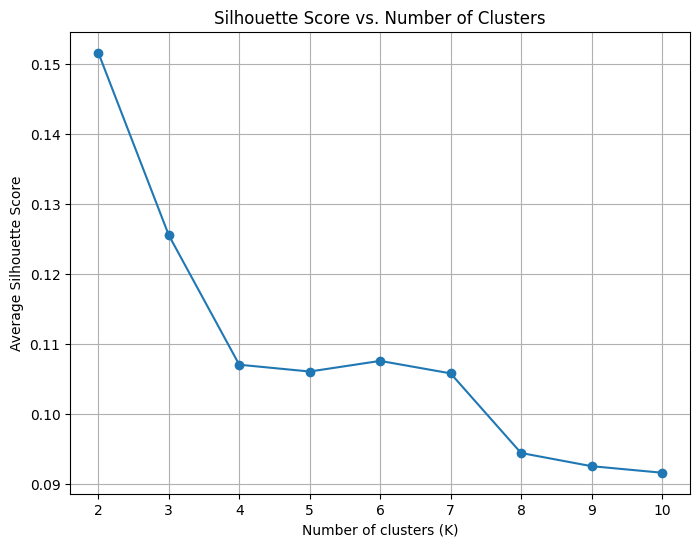

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# 1. Load the Olivetti Faces dataset
olivetti = fetch_olivetti_faces(shuffle=True, random_state=42) # Ensures consistent shuffling
faces = olivetti.data

# 2. Determine the number of samples and features
n_samples, n_features = faces.shape

# Set a range of cluster numbers to explore
cluster_range = range(2, 11)  # Testing 2 to 10 clusters

silhouette_scores = []

for n_clusters in cluster_range:
    # 3. Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  # added n_init
    cluster_labels = kmeans.fit_predict(faces)

    # 4. Calculate Silhouette Score
    silhouette_avg = silhouette_score(faces, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # 5. Create Silhouette Plots

    # Get silhouette values for each sample
    sample_silhouette_values = silhouette_samples(faces, cluster_labels)

    fig, ax1 = plt.subplots(1, 1)  # Adjusted subplots

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"Silhouette plot for n_clusters = {n_clusters}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The silhouette coefficient values range from -1 to 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, n_samples + (n_clusters + 1) * 10])

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.tight_layout() #Prevents labels from overlapping
    plt.show()

# 6. Plot the average Silhouette Scores for each K
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()
